# Computation on Arrays: Broadcasting

 Broadcasting is simply a set of rules for applying binary ufuncs 
(addition, subtraction, multiplication, etc.) on arrays of different sizes
 The advantage of NumPy’s broadcasting is that
this duplication of values does not actually take place, but it is a useful mental model
as we think about broadcasting.

In [2]:
import numpy as np
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

array([5, 6, 7])

In [3]:
M = np.ones((3, 3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [4]:
M+a # Here a array individually adds to every row of array M

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

Here the one-dimensional array a is stretched, or broadcast, across the second
dimension in order to match the shape of M.

In [5]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis] # np.arange.reshape((3,1)) would have also worked
print(a)              # The dimension is changed from 1,3 to 3,1
print(b)


[0 1 2]
[[0]
 [1]
 [2]]


In [6]:
a+b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

Rules of Broadcasting

Broadcasting in NumPy follows a strict set of rules to determine the interaction
between the two arrays:

• Rule 1: If the two arrays differ in their number of dimensions, the shape of the
one with fewer dimensions is padded with ones on its leading (left) side.

• Rule 2: If the shape of the two arrays does not match in any dimension, the array
with shape equal to 1 in that dimension is stretched to match the other shape.

• Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is
raised.


In [18]:
a[:,np.newaxis].shape # actual a has a dimension 1:3, but on using newaxis function domension is 3:1 now

(3, 1)

In [20]:
np.logaddexp(a, b) # here is the logaddexp(a, b) function,which computes log(exp(a) + exp(b)) with more precision than the naive approach

array([[0.69314718, 1.31326169, 2.12692801],
       [1.31326169, 1.69314718, 2.31326169],
       [2.12692801, 2.31326169, 2.69314718]])

In [3]:
# Centering an array
X = np.random.random((10, 3))
Xmean = X.mean(0) # 0 here defines the axis
Xmean

array([0.48307014, 0.55870659, 0.52197459])

In [6]:
X_centered = X - Xmean
X_centered.mean(0)
# X_centered mean is also calculated along 0 axis

array([-6.66133815e-17, -1.55431223e-16, -6.66133815e-17])

# Plotting a two-dimensional function

One place that broadcasting is very useful is in displaying images based on twodimensional functions.

In [8]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
z

array([[-0.83907153, -0.83470697, -0.8216586 , ...,  0.8956708 ,
         0.68617261,  0.41940746],
       [-0.83907153, -0.82902677, -0.8103873 , ...,  0.92522407,
         0.75321348,  0.52508175],
       [-0.83907153, -0.82325668, -0.79876457, ...,  0.96427357,
         0.84172689,  0.66446403],
       ...,
       [-0.83907153, -0.48233077, -0.01646558, ...,  0.96449925,
         0.75196531,  0.41982581],
       [-0.83907153, -0.47324558,  0.00392612, ...,  0.92542163,
         0.68540362,  0.37440839],
       [-0.83907153, -0.46410908,  0.02431613, ...,  0.89579384,
         0.65690314,  0.40107702]])

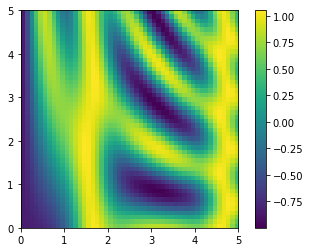

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],
    cmap='viridis')
plt.colorbar();

In [14]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [29]:
x<6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

# Working with boolean arrays

In [30]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [33]:
# how many values less than 6?
np.count_nonzero(x < 6,axis=0) # or np.sum(x<6,axis=0)
# The output returns the number of elements having value less than 6 in every column

array([2, 2, 2, 2], dtype=int64)

In [15]:
# If we want to know if any or all the values satisfy the given function then np.any()/np.all()/ is used
print(np.any(x<0))
print(np.all(x<10,axis=0)) 

False
[ True  True  True  True]


In [40]:
np.any(x==6)

True

In [41]:
np.all(x<8,axis=1)

array([ True, False,  True])

In [42]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [49]:
x[x<5] # also i can add these results by using x[x<5].sum()

array([0, 3, 3, 3, 2, 4])

# Using the Keywords and/or Versus the Operators &/|
The difference is this: and and or gauge the truth or falsehood of entire object, while &
and | refer to bits within each object.When you use and or or, it’s equivalent to asking 
Python to treat the object as a single Boolean entity.

In [52]:
 bool(42), bool(0)

(True, False)

In [53]:
bool(42 and 0)

False

In [54]:
bool(42 or 0)

True

In [55]:
bin(42)

'0b101010'

In [56]:
bin(59)

'0b111011'

In [57]:
bin(42 & 59)


'0b101010'

In [58]:
bin(42 | 59)

'0b111011'

In [61]:
bool(42 | 59)

True

In [17]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B  # using or instead of | will not give any output as (or) donot calculate bitwise , instead error will be shown

array([ True,  True,  True, False,  True,  True])

# Fancy Indexing


 Fancy indexing is like the simple indexing we’ve already seen, but we pass
arrays of indices in place of single scalars. This allows us to very quickly access and
modify complicated subsets of an array’s values.


In [1]:
import numpy as np
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [22]:
np.random.RandomState?

In [26]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [29]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

In [13]:
ind = np.array([[3, 7],
 [4, 5]])
x[ind]


array([[71, 86],
       [60, 20]])

In [14]:
#Fancy indexing also works in multiple dimensions.
X = np.arange(12).reshape((3, 4))
X


array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [35]:
row = np.array([0, 1, 2])# element (0,2),(1,1),(2,3) are called as per the given function
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [36]:
X[row[:, np.newaxis], col] # row's axis is changed as shown below and columns are broadcasted
# (0,2),(0,1),(0,3),(1,2),(1,1),(1,3),(2,2),(2,1),(2,3)

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [37]:
row[:, np.newaxis] # generates row function as another axis

array([[0],
       [1],
       [2]])

In [18]:
row[:, np.newaxis] * col


array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

It is always important to remember with fancy indexing that the return value reflects
the broadcasted shape of the indices, rather than the shape of the array being indexed.


# Combined Indexing

In [31]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [32]:
# We can combine fancy and simple indices:
X[2,[2,0,1]]

array([10,  8,  9])

In [33]:
X[1:, [2, 0, 1]] # (1,2),(1,0),(1,1);(2,2),(2,0),(2,1) are the values which are shown in the above command 

array([[ 6,  4,  5],
       [10,  8,  9]])

In [38]:
mask = np.array([1, 0, 1, 0],dtype=bool)
X[row[:, np.newaxis], mask] # Here mask is multiplied to each rows and output is given , since column 1,3 returns 0 values. hence, they are absent from the output

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

All of these indexing options combined lead to a very flexible set of operations for
accessing and modifying array values.

In [41]:
mask = np.array([1, 0, 1, 0]) # row = np.array([0, 1, 2]) from above defined row 
X[row[:, np.newaxis], mask]

array([[1, 0, 1, 0],
       [5, 4, 5, 4],
       [9, 8, 9, 8]])

In [45]:
X[row[:,np.newaxis]]

array([[[ 0,  1,  2,  3]],

       [[ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11]]])

In [46]:
rand.multivariate_normal?

In [52]:
mean = [0, 0]
cov = [[1, 2],
 [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)

In [48]:
X.shape

(100, 2)

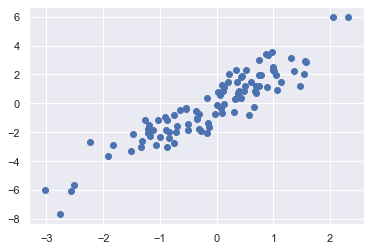

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # for plot styling
plt.scatter(X[:, 0], X[:, 1]);

In [57]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([72, 73, 25, 49,  0, 69, 44, 55, 64, 46, 90, 33, 54, 29, 47, 79, 82,
       60, 94, 40])

In [42]:
np.random.choice?

In [59]:
selection = X[indices] # fancy indexing here
#selection.shape
selection

array([[-0.48919319, -1.08482137],
       [ 1.65860668,  3.09054352],
       [ 0.52027322,  3.25167427],
       [ 0.17360854,  1.67679999],
       [ 0.35713769,  2.35807765],
       [ 0.2810573 ,  0.67359357],
       [-1.43541048, -1.89315839],
       [ 0.48502991,  0.50735689],
       [ 0.32232057,  0.99876682],
       [ 0.24624825,  1.54348827],
       [-0.28190202, -0.774105  ],
       [-0.9525947 ,  0.24168651],
       [-0.10578708,  0.66894297],
       [ 1.23659796,  2.87163211],
       [-0.23798433, -1.34318195],
       [-1.80402237, -2.38957601],
       [ 0.66427617,  0.13700037],
       [ 0.64930135,  1.55800863],
       [-0.35534816, -0.5306269 ],
       [-0.36436501, -0.99709221]])

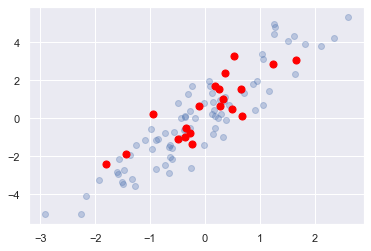

In [68]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
facecolor='red', s=50);


In [57]:
plt.scatter?

# Modifying values with fancy indexing

In [1]:
import numpy as np
x=np.arange(10)
i=np.array([2,1,8,4])
x[i]=99
x

array([ 0, 99, 99,  3, 99,  5,  6,  7, 99,  9])

In [2]:
x[i]-=10
x

array([ 0, 89, 89,  3, 89,  5,  6,  7, 89,  9])

Notice, though, that repeated indices with these operations can cause some poten‐
tially unexpected results

In [7]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [8]:
i = [2, 3, 3, 5, 5, 5]
x[i] += 1
x


array([6., 0., 1., 1., 0., 1., 0., 0., 0., 0.])

Where did the 4 go? The result of this operation is to first assign x[0] = 4, followed
by x[0] = 6. The result, of course, is that x[0] contains the value 6. 
You might expect that x[3] would contain the value 2, and x[4] would contain the
value 3, as this is how many times each index is repeated. Why is this not the case?
Conceptually, this is because x[i] += 1 is meant as a shorthand of x[i] = x[i] + 1.
x[i] + 1 is evaluated, and then the result is assigned to the indices in x. With this in
mind, it is not the augmentation that happens multiple times, but the assignment,
which leads to the rather nonintuitive results.

So what if you want the other behavior where the operation is repeated? For this, you
can use the at() method of ufuncs


In [9]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 0. 3. 0. 0. 0. 0.]


The at() method does an in-place application of the given operator at the specified
indices (here, i) with the specified value (here, 1). Another method that is similar in
spirit is the reduceat() method of ufuncs

# Binning of Data

You can use these ideas to efficiently bin data to create a histogram by hand. For
example, imagine we have 1,000 values and would like to quickly find where they fall
within an array of bins

C:\Users\gdg13\anaconda\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).


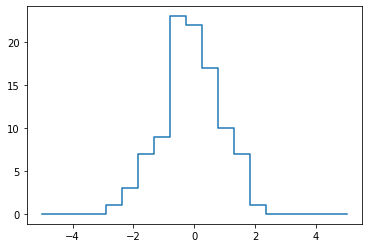

In [2]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x , creates an array indicating the indices to every value if placed at bins
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

# plot the results
plt.plot(bins, counts, linestyle='steps');



In [7]:
counts

array([ 0.,  0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,
        7.,  1.,  0.,  0.,  0.,  0.,  0.])

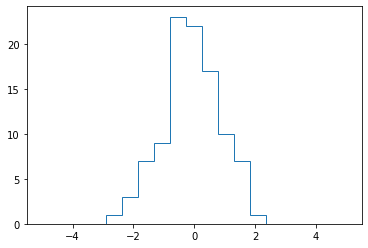

In [25]:
plt.hist(x, bins, histtype='step');

In [8]:
plt.hist?

In [28]:
np.histogram?

In [29]:
counts, edges = np.histogram(x, bins)

In [30]:
counts

array([ 0,  0,  0,  0,  1,  3,  7,  9, 23, 22, 17, 10,  7,  1,  0,  0,  0,
        0,  0], dtype=int64)

In [31]:
edges

array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
       -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
        0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
        2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ])

In [37]:
import numpy as np # Though copied , didn't get the algorithm
def selection_sort(x):
  for i in range(len(x)):
     swap = i+ np.argmin(x[i:])
     (x[i], x[swap]) = (x[swap], x[i])
  return x

x = np.array([2, 1, 4, 3, 5])
selection_sort(x)

array([1, 2, 3, 4, 5])

In [10]:
def sort(x):
    for i in range(len(x)):
        pos=np.argmin(x[i:])
        (x[i],x[pos])=(x[pos],x[i])
    return x
x=np.array([2,5,4,1,3])
sort(x)

array([3, 5, 4, 1, 2])

In [9]:
np.argmin?

In [38]:
def bogosort(x):  # Though copied , didn't get the algorithm
 while np.any(x[:-1] > x[1:]):
    np.random.shuffle(x)
 return x
x = np.array([2, 1, 4, 3, 5])
bogosort(x)


array([1, 2, 3, 4, 5])

This silly sorting method relies on pure chance: it repeatedly applies a random shuf‐
fling of the array until the result happens to be sorted. With an average scaling of
ᇭ N × N! (that’s N times N factorial), this should—quite obviously—never be used
for any real computation.

# Fast Sorting in NumPy: np.sort and np.argsort

In [41]:
x = np.array([2, 1, 4, 3, 5])
np.sort(x)


array([1, 2, 3, 4, 5])

#argsort returns  the position of the elements before sorting

In [42]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)


[1 0 3 2 4]


# Sorting along rows or columns

In [23]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [24]:
# sort each column of X
np.sort(X, axis=0)


array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

# Partial Sorts: Partitioning

Sometimes we’re not interested in sorting the entire array, but simply want to find the
K smallest values in the array. NumPy provides this in the np.partition function.
np.partition takes an array and a number K; the result is a new array with the small‐
est K values to the left of the partition, and the remaining values to the right

In [25]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)


array([2, 1, 3, 4, 6, 5, 7])

In [26]:
np.partition(X, 2, axis=1)
# Similarly a multidimensional array can be partitioned

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

In [30]:
np.argpartition(X,2,axis=1) # It tells the position of the sorted elements in the actual array

array([[1, 3, 0, 2, 4, 5],
       [0, 4, 3, 2, 1, 5],
       [4, 1, 3, 2, 0, 5],
       [3, 1, 2, 0, 4, 5]], dtype=int64)

The result is an array where the first two slots in each row contain the smallest values
from that row, with the remaining values filling the remaining slots.

In [6]:
X = rand.rand(10, 2)
X

array([[0.00706631, 0.02306243],
       [0.52477466, 0.39986097],
       [0.04666566, 0.97375552],
       [0.23277134, 0.09060643],
       [0.61838601, 0.38246199],
       [0.98323089, 0.46676289],
       [0.85994041, 0.68030754],
       [0.45049925, 0.01326496],
       [0.94220176, 0.56328822],
       [0.3854165 , 0.01596625]])

In [7]:
X[:, np.newaxis, :] - X[np.newaxis, :, :]


array([[[ 0.        ,  0.        ],
        [-0.51770836, -0.37679855],
        [-0.03959936, -0.95069309],
        [-0.22570504, -0.06754401],
        [-0.6113197 , -0.35939957],
        [-0.97616458, -0.44370047],
        [-0.8528741 , -0.65724511],
        [-0.44343295,  0.00979746],
        [-0.93513545, -0.54022579],
        [-0.3783502 ,  0.00709617]],

       [[ 0.51770836,  0.37679855],
        [ 0.        ,  0.        ],
        [ 0.478109  , -0.57389455],
        [ 0.29200332,  0.30925454],
        [-0.09361135,  0.01739898],
        [-0.45845623, -0.06690192],
        [-0.33516575, -0.28044657],
        [ 0.07427541,  0.38659601],
        [-0.4174271 , -0.16342725],
        [ 0.13935816,  0.38389472]],

       [[ 0.03959936,  0.95069309],
        [-0.478109  ,  0.57389455],
        [ 0.        ,  0.        ],
        [-0.18610568,  0.88314908],
        [-0.57172035,  0.59129353],
        [-0.93656522,  0.50699263],
        [-0.81327474,  0.29344798],
        [-0.40383359,  0

# Structured Data: NumPy’s Structured Arrays


But this is a bit clumsy. There’s nothing here that tells us that the three arrays are
related; it would be more natural if we could use a single structure to store all of this
data. NumPy can handle this through structured arrays, which are arrays with com‐
pound data types.

In [41]:
# Use a compound data type for structured arrays
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'), 
                          'formats':('U10', 'i4', 'f8')})
print(data.dtype)

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


In [49]:
data['name'] ="Gagan",
data['age'] ="22"
data['weight'] = "74"
print(data)


[('Gagan', 22, 74.) ('Gagan', 22, 74.) ('Gagan', 22, 74.)
 ('Gagan', 22, 74.)]


# More Advanced Compound Types


 you can create a type where each element contains an array or matrix of values. Here, we’ll
create a data type with a mat component consisting of a 3×3 floating-point matrix

In [54]:
tp = np.dtype([('id', 'i8'), ('mat', 'f8', (3, 3))])
X = np.zeros(1, dtype=tp)
print(X[0])
print(X['mat'][0])


(0, [[0., 0., 0.], [0., 0., 0.], [0., 0., 0.]])
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Now each element in the X array consists of an id and a 3×3 matrix. Why would you
use this rather than a simple multidimensional array, or perhaps a Python dictionary?
The reason is that this NumPy dtype directly maps onto a C structure definition, so
the buffer containing the array content can be accessed directly within an appropri‐
ately written C program. If you find yourself writing a Python interface to a legacy C
or Fortran library that manipulates structured data, you’ll probably find structured
arrays quite useful!


In [56]:
np.dtype?